# Data Pipelines Project

## Acquisition
I found a data set on Kaggle with 2 csv files : 
- Startup founder chars with profiles of startup founders (university, employment...)
- Startup valuations : after each fund raising (seed, srie A and serie B) 

I work first with the Startup founder chars. 

In [1]:
import pandas as pd
import os
os.chdir(r'C:\Users\Lenovo\Ironhack\Bootcamp\Projects\startup-founder-valuations-dataset')

In [2]:
df =pd.read_csv('startup_founder_chars.csv', sep=',',  encoding='latin-1')

In [3]:
df.shape

(574, 20)

In [4]:
df.head()

,Full Name,Primary Company,Previous startups?,Consulting before start-up,Standardized University,Standardized Major,Degree Type,Standardized Graduate Institution,Standardized Graduate Studies,Graduate Diploma,Ever served as TA/Teacher/Professor/Mentor?,Years of Employment,Worked as product manager/director/head/VP?,Worked at Google?,Worked at Microsoft?,Worked in Sales?,Stanford or Berkeley,Ivy League,Crunchbase,LinkedIn
0,Chad Hurley,YouTube,0.0,0.0,Indiana University of Pennsylvania,Design,NaN,NaN,NaN,NaN,0.0,4.0,1.0,1.0,0.0,0.0,0,0,https://www.crunchbase.com/person/chad-hurley,http://www.linkedin.com/profile/view?id=5711
1,Gwyneth Paltrow,Goop Inc.,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.0,1.0,0.0,0.0,0.0,0,0,https://www.crunchbase.com/person/gwyneth-paltrow,https://www.linkedin.com/in/gwyneth-paltrow-48...
2,Jason Calacanis,Inside.com,3.0,0.0,Fordham University,Psychology,BA,NaN,NaN,NaN,0.0,4.0,1.0,0.0,0.0,0.0,0,0,https://www.crunchbase.com/person/jason-calacanis,http://www.linkedin.com/in/jasoncalacanis
3,Tony Fadell,Nest Labs,1.0,0.0,University of Michigan,Computer Science,BS,NaN,NaN,NaN,0.0,18.0,1.0,0.0,0.0,0.0,0,0,https://www.crunchbase.com/person/tony-fadell,http://www.linkedin.com/pub/tony-fadell/0/1/380
4,Matt Mullenweg,Automattic,1.0,0.0,University of Houston,NaN,NaN,NaN,NaN,NaN,0.0,15.0,1.0,0.0,0.0,0.0,0,0,https://www.crunchbase.com/person/matt-mullenweg,http://www.linkedin.com/in/mattm


## Wrangling - 1st data set
Clean the data set and prepare it to be analyzed.
Techniques used : 
- Missing values with isna function 
- Logical errors
- Data type correction 
- Low variance 
- Text cleaning
- Categorization 

In [5]:
## Change name of columns
df.columns=['Full_Name', 'Primary_Company', 'Previous_startups',
       'Consulting_before_start-up', 'Bachelor_University',
       'Bachelor_Studies', 'Degree_Type',
       'Master_Institution', 'Master_Studies',
       'Graduate_Diploma', 'Ever_served_as_TA_Teacher_Professor_Mentor',
       'Years_of_Employment', 'Worked_as_product_manager_director_head_VP',
       'Worked_at_Google', 'Worked_at_Microsoft', 'Worked_in_Sales',
       'Stanford_or_Berkeley', 'Ivy_League', 'Crunchbase', 'LinkedIn']

In [6]:
# Change order of column
column_order = ['Full_Name', 'Primary_Company', 'Bachelor_University',
       'Bachelor_Studies', 'Degree_Type',
       'Master_Institution', 'Master_Studies',
       'Graduate_Diploma','Years_of_Employment','Previous_startups',
       'Consulting_before_start-up', 'Ever_served_as_TA_Teacher_Professor_Mentor',
        'Worked_as_product_manager_director_head_VP',
       'Worked_at_Google', 'Worked_at_Microsoft', 'Worked_in_Sales',
       'Stanford_or_Berkeley', 'Ivy_League', 'Crunchbase', 'LinkedIn']
df=df[column_order]
df.head()

,Full_Name,Primary_Company,Bachelor_University,Bachelor_Studies,Degree_Type,Master_Institution,Master_Studies,Graduate_Diploma,Years_of_Employment,Previous_startups,Consulting_before_start-up,Ever_served_as_TA_Teacher_Professor_Mentor,Worked_as_product_manager_director_head_VP,Worked_at_Google,Worked_at_Microsoft,Worked_in_Sales,Stanford_or_Berkeley,Ivy_League,Crunchbase,LinkedIn
0,Chad Hurley,YouTube,Indiana University of Pennsylvania,Design,NaN,NaN,NaN,NaN,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,https://www.crunchbase.com/person/chad-hurley,http://www.linkedin.com/profile/view?id=5711
1,Gwyneth Paltrow,Goop Inc.,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,https://www.crunchbase.com/person/gwyneth-paltrow,https://www.linkedin.com/in/gwyneth-paltrow-48...
2,Jason Calacanis,Inside.com,Fordham University,Psychology,BA,NaN,NaN,NaN,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,https://www.crunchbase.com/person/jason-calacanis,http://www.linkedin.com/in/jasoncalacanis
3,Tony Fadell,Nest Labs,University of Michigan,Computer Science,BS,NaN,NaN,NaN,18.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,https://www.crunchbase.com/person/tony-fadell,http://www.linkedin.com/pub/tony-fadell/0/1/380
4,Matt Mullenweg,Automattic,University of Houston,NaN,NaN,NaN,NaN,NaN,15.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,https://www.crunchbase.com/person/matt-mullenweg,http://www.linkedin.com/in/mattm


### Missing values

In [7]:
df_m=df.isna().sum()
df_m50=df_m[df_m>50]/df.shape[0]*100
df_m50.round(1)

Bachelor_University    12.0
Bachelor_Studies       22.6
Degree_Type            24.7
Master_Institution     55.9
Master_Studies         55.1
Graduate_Diploma       55.1
dtype: float64

### Logical errors

In [9]:
## Fill the rows of Bachelor Studies and Degree Type that were null and the Bachelor University were fill with Unspecified
df[['Bachelor_Studies','Degree_Type']]=df[['Bachelor_Studies','Degree_Type']].fillna('Unspecified')

In [10]:
## And the others: Not provided 
df.loc[(df.Bachelor_University.isna())&(df.Bachelor_Studies =='Unspecified'),['Bachelor_Studies','Bachelor_University','Degree_Type']]='Not provided'

In [11]:
## For the 3 columns Master 55% of each columns were null so I guess that 
#the founders have not master. I fill with no master. 
df[['Master_Institution','Master_Studies','Graduate_Diploma']]=df[['Master_Institution','Master_Studies','Graduate_Diploma']].astype(object).fillna('No Master')

In [12]:
df.head(5)

,Full_Name,Primary_Company,Bachelor_University,Bachelor_Studies,Degree_Type,Master_Institution,Master_Studies,Graduate_Diploma,Years_of_Employment,Previous_startups,Consulting_before_start-up,Ever_served_as_TA_Teacher_Professor_Mentor,Worked_as_product_manager_director_head_VP,Worked_at_Google,Worked_at_Microsoft,Worked_in_Sales,Stanford_or_Berkeley,Ivy_League,Crunchbase,LinkedIn
0,Chad Hurley,YouTube,Indiana University of Pennsylvania,Design,Unspecified,No Master,No Master,No Master,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,https://www.crunchbase.com/person/chad-hurley,http://www.linkedin.com/profile/view?id=5711
1,Gwyneth Paltrow,Goop Inc.,Not provided,Not provided,Not provided,No Master,No Master,No Master,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,https://www.crunchbase.com/person/gwyneth-paltrow,https://www.linkedin.com/in/gwyneth-paltrow-48...
2,Jason Calacanis,Inside.com,Fordham University,Psychology,BA,No Master,No Master,No Master,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,https://www.crunchbase.com/person/jason-calacanis,http://www.linkedin.com/in/jasoncalacanis
3,Tony Fadell,Nest Labs,University of Michigan,Computer Science,BS,No Master,No Master,No Master,18.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,https://www.crunchbase.com/person/tony-fadell,http://www.linkedin.com/pub/tony-fadell/0/1/380
4,Matt Mullenweg,Automattic,University of Houston,Unspecified,Unspecified,No Master,No Master,No Master,15.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,https://www.crunchbase.com/person/matt-mullenweg,http://www.linkedin.com/in/mattm


In [13]:
df=df.fillna(0)

### Data Type correction

In [14]:
df['Previous_startups'] = df['Previous_startups'].astype('int')
df['Consulting_before_start-up'] = df['Consulting_before_start-up'].astype('int')
df['Ever_served_as_TA_Teacher_Professor_Mentor'] = df['Ever_served_as_TA_Teacher_Professor_Mentor'].astype('int')
df['Worked_as_product_manager_director_head_VP'] = df['Worked_as_product_manager_director_head_VP'].astype('int')
df['Worked_at_Google'] = df['Worked_at_Google'].astype('int')
df['Worked_at_Microsoft'] = df['Worked_at_Microsoft'].astype('int')
df['Worked_in_Sales'] = df['Worked_in_Sales'].astype('int')

In [15]:
df.dtypes

Full_Name                                      object
Primary_Company                                object
Bachelor_University                            object
Bachelor_Studies                               object
Degree_Type                                    object
Master_Institution                             object
Master_Studies                                 object
Graduate_Diploma                               object
Years_of_Employment                           float64
Previous_startups                               int32
Consulting_before_start-up                      int32
Ever_served_as_TA_Teacher_Professor_Mentor      int32
Worked_as_product_manager_director_head_VP      int32
Worked_at_Google                                int32
Worked_at_Microsoft                             int32
Worked_in_Sales                                 int32
Stanford_or_Berkeley                            int64
Ivy_League                                      int64
Crunchbase                  

In [16]:
cols_to_drop=['Crunchbase','LinkedIn']
df=df.drop(cols_to_drop, axis=1)

### Low variance

In [17]:
from numpy import percentile

In [18]:
low_variance=[]
for col in df._get_numeric_data():
    minimum =min(df[col])
    ninety_percentile=percentile(df[col],90)
    if minimum == ninety_percentile:
        low_variance.append(col)
print(low_variance)
# Less than 10% work in Google and less than 10% did Standford or Berkeley --> not relevant to drop this column there are dummies

['Worked_at_Google', 'Worked_at_Microsoft', 'Stanford_or_Berkeley']


### Text cleaning

In [19]:
before = len(df)
df = df.drop_duplicates()
after = len(df)
print('Number of duplicate records dropped: ', str(before - after))


Number of duplicate records dropped:  0


In [20]:
df.Bachelor_University.value_counts()
#No ponctuation - not necessary to clean

Not provided                                    69
Stanford University                             31
Harvard University                              22
University of California Berkeley               16
University of Pennsylvania                      16
Massachusetts Institute of Technology           15
Brigham Young University                        10
Princeton University                            10
Dartmouth College                                9
University of Texas Austin                       9
Cornell University                               9
Columbia University                              7
University of Michigan                           7
Yale University                                  7
Carnegie Mellon University                       7
Brown University                                 6
University of California Los Angeles             6
University of Illinois Urbana-Champaign          6
University of Washington                         5
New York University            

In [21]:
df.Bachelor_Studies.value_counts()
df.loc[df.Bachelor_Studies=='Opreations Research','Bachelor_Studies']='Operations Research'
df.loc[df.Bachelor_Studies=='Mechanical Engineering','Bachelor_Studies']='Engineering'
df.loc[df.Bachelor_Studies=='Electrical Engineering','Bachelor_Studies']='Engineering'
df.loc[df.Bachelor_Studies=='Desgin','Bachelor_Studies']='Design'
df.loc[df.Bachelor_Studies=='Public Policy','Bachelor_Studies']='Political Science'

df.Bachelor_Studies.value_counts()

Computer Science            111
Engineering                  80
Not provided                 69
Unspecified                  61
Business                     51
Economics                    39
Political Science            27
Operations Research          24
Biology                      12
Physics                      12
International Relations      11
Mathematics                  10
History                      10
English                       8
Design                        8
Sociology                     7
Psychology                    7
Cognitive Science             5
Chemistry                     5
Philosophy                    4
Film                          3
Media                         2
Music                         2
Language                      2
Architecture                  2
Interdisciplinary Degree      1
Geology                       1
Name: Bachelor_Studies, dtype: int64

In [22]:
## regroup Degree type in 4 categories
df.loc[df.Degree_Type=='MA', 'Degree_Type']='BA'
df.loc[df.Degree_Type=='Design','Degree_Type']='BA'
df.loc[df.Degree_Type=='AA','Degree_Type']='BA'
df.loc[df.Degree_Type=='JD','Degree_Type']='Jurist Doctor'
df.loc[df.Degree_Type=='LLB','Degree_Type']='Jurist Doctor'
df.loc[df.Degree_Type=='MS','Degree_Type']='BS'
df.loc[df.Degree_Type=='Engineering','Degree_Type']='BE'
df.loc[df.Degree_Type=='Drop','Degree_Type']='Not provided'
df.loc[df.Degree_Type=='Operations Research','Degree_Type']='BS'

df.Degree_Type.value_counts()

BS               203
BA               186
Not provided      75
Unspecified       73
BE                34
Jurist Doctor      2
PhD                1
Name: Degree_Type, dtype: int64

In [23]:
df.Master_Studies.value_counts()
df.loc[df.Master_Studies=='Opreations Research','Master_Studies']='Operations Research'
df.loc[df.Master_Studies=='Mechanical Engineering','Master_Studies']='Engineering'
df.loc[df.Master_Studies=='Electrical Engineering','Master_Studies']='Engineering'
df.loc[df.Master_Studies=='Foreign Studies','Master_Studies']='International Relations'
df.Master_Studies.value_counts()

No Master                  316
Business                   153
Computer Science            37
Engineering                 15
Law                          8
Operations Research          6
Biology                      6
Physics                      4
Media                        3
Mathematics                  3
International Relations      3
Economics                    2
Education                    2
Film                         2
Medicine                     2
Sociology                    2
Political Science            2
Chemistry                    1
Cognitive Science            1
Journalism                   1
Design                       1
Geophysics                   1
Satistics                    1
Psychology                   1
Philosophy                   1
Name: Master_Studies, dtype: int64

In [24]:

df.loc[df.Graduate_Diploma=='BPhil','Graduate_Diploma']='MA'
df.loc[df.Graduate_Diploma=='BA','Graduate_Diploma']='MA'
df.loc[df.Graduate_Diploma=='MD','Graduate_Diploma']='PhD'
df.Graduate_Diploma.value_counts()

No Master               316
MBA                     127
MS                       51
PhD                      39
MA                       15
JD                        9
MEng                      7
Executive Education       6
MBI                       1
AAS                       1
BSc                       1
Associate Instructor      1
Name: Graduate_Diploma, dtype: int64

In [25]:
df

,Full_Name,Primary_Company,Bachelor_University,Bachelor_Studies,Degree_Type,Master_Institution,Master_Studies,Graduate_Diploma,Years_of_Employment,Previous_startups,Consulting_before_start-up,Ever_served_as_TA_Teacher_Professor_Mentor,Worked_as_product_manager_director_head_VP,Worked_at_Google,Worked_at_Microsoft,Worked_in_Sales,Stanford_or_Berkeley,Ivy_League
0,Chad Hurley,YouTube,Indiana University of Pennsylvania,Design,Unspecified,No Master,No Master,No Master,4.0,0,0,0,1,1,0,0,0,0
1,Gwyneth Paltrow,Goop Inc.,Not provided,Not provided,Not provided,No Master,No Master,No Master,12.0,0,0,0,1,0,0,0,0,0
2,Jason Calacanis,Inside.com,Fordham University,Psychology,BA,No Master,No Master,No Master,4.0,3,0,0,1,0,0,0,0,0
3,Tony Fadell,Nest Labs,University of Michigan,Computer Science,BS,No Master,No Master,No Master,18.0,1,0,0,1,0,0,0,0,0
4,Matt Mullenweg,Automattic,University of Houston,Unspecified,Unspecified,No Master,No Master,No Master,15.0,1,0,0,1,0,0,0,0,0
5,Eric Lefkofsky,Tempus,University of Michigan,Unspecified,BA,University of Michigan,Law,JD,0.0,6,0,1,1,0,0,0,0,0
6,Kevin Systrom,Instagram,Stanford University,Operations Research,Unspecified,No Master,No Master,No Master,5.0,0,0,0,1,1,0,0,1,0
7,Matt Humphrey,LendingHome,Carnegie Mellon University,Computer Science,BS,Carnegie Mellon University,Business,MBA,0.0,4,0,0,1,0,0,0,0,0
8,Dustin Moskovitz,Asana,Harvard University,Economics,Unspecified,No Master,No Master,No Master,0.0,3,0,0,1,0,0,0,0,1
9,Jan Koum,WhatsApp,San Jose State University,Computer Science,BS,No Master,No Master,No Master,9.0,0,0,0,0,0,0,0,0,0


### Categorization
I create 2 categories : 
- Years employment with 4 categories depending of how many years each founders where been employ. I use the cut functions.
- Years of study with 4 categories : 8 years for PhD / 6 years for Master / 4 years for Bachelor and 0 for the rest. I use the loc function. 

In [26]:
Years_Emp=['Less than 2','2 to 5','5 to 10','Up to 10']
cutoffs = [0,2,5,10,25]
df['Cat_YP']=pd.cut(df['Years_of_Employment'],cutoffs, labels=Years_Emp)

In [27]:
df['Years_of_Study']=0
df.loc[(df.Graduate_Diploma=='PhD'),['Years_of_Study']]=8
df.loc[(df.Graduate_Diploma!='No Master'),['Years_of_Study']]=6
df.loc[(df.Graduate_Diploma=='No Master')&(df.Degree_Type!='Not provided'),['Years_of_Study']]=4
df.loc[(df.Graduate_Diploma=='PhD'),['Years_of_Study']]=8
df.loc[(df.Degree_Type=='Not provided'),['Years_of_Study']]=0

In [28]:
df.head()

,Full_Name,Primary_Company,Bachelor_University,Bachelor_Studies,Degree_Type,Master_Institution,Master_Studies,Graduate_Diploma,Years_of_Employment,Previous_startups,Consulting_before_start-up,Ever_served_as_TA_Teacher_Professor_Mentor,Worked_as_product_manager_director_head_VP,Worked_at_Google,Worked_at_Microsoft,Worked_in_Sales,Stanford_or_Berkeley,Ivy_League,Cat_YP,Years_of_Study
0,Chad Hurley,YouTube,Indiana University of Pennsylvania,Design,Unspecified,No Master,No Master,No Master,4.0,0,0,0,1,1,0,0,0,0,2 to 5,4
1,Gwyneth Paltrow,Goop Inc.,Not provided,Not provided,Not provided,No Master,No Master,No Master,12.0,0,0,0,1,0,0,0,0,0,Up to 10,0
2,Jason Calacanis,Inside.com,Fordham University,Psychology,BA,No Master,No Master,No Master,4.0,3,0,0,1,0,0,0,0,0,2 to 5,4
3,Tony Fadell,Nest Labs,University of Michigan,Computer Science,BS,No Master,No Master,No Master,18.0,1,0,0,1,0,0,0,0,0,Up to 10,4
4,Matt Mullenweg,Automattic,University of Houston,Unspecified,Unspecified,No Master,No Master,No Master,15.0,1,0,0,1,0,0,0,0,0,Up to 10,4


## Merge with a data Frame
I merge with startup valuation csv file. 
- I change the name of column and use inner function to merge; 
- I merge with the column full_name

In [29]:
df_val =pd.read_csv('startup_valuations.csv', sep=',',  encoding='latin-1')
df_val.head()

,Full Name,Primary Company,Seed Valuation,A Valuation,B Valuation,Valuation Increase
0,Chad Hurley,YouTube,0,"14,000,000.00","88,400,000.00",6.314285714
1,Gwyneth Paltrow,Goop Inc.,0,"40,000,000.00","65,000,000.00",1.625
2,Jason Calacanis,Inside.com,"$7,000,000.00","11,250,000.00",0,#VALUE!
3,Tony Fadell,Nest Labs,"$2,700,000.00","49,210,000.00","288,120,000.00",5.854907539
4,Matt Mullenweg,Automattic,0,"8,650,000.00","238,590,000.00",27.58265896


In [30]:
df_val.columns=['Full_Name', 'Primary_Company', 'Seed_Valuation', 'A_Valuation',
       'B_Valuation', 'Valuation_Increase']

In [31]:
df_val.head(3)

,Full_Name,Primary_Company,Seed_Valuation,A_Valuation,B_Valuation,Valuation_Increase
0,Chad Hurley,YouTube,0,"14,000,000.00","88,400,000.00",6.314285714
1,Gwyneth Paltrow,Goop Inc.,0,"40,000,000.00","65,000,000.00",1.625
2,Jason Calacanis,Inside.com,"$7,000,000.00","11,250,000.00",0,#VALUE!


In [32]:
data =df.merge(df_val, how='inner', on='Full_Name')
data.head()

,Full_Name,Primary_Company_x,Bachelor_University,Bachelor_Studies,Degree_Type,Master_Institution,Master_Studies,Graduate_Diploma,Years_of_Employment,Previous_startups,...,Worked_in_Sales,Stanford_or_Berkeley,Ivy_League,Cat_YP,Years_of_Study,Primary_Company_y,Seed_Valuation,A_Valuation,B_Valuation,Valuation_Increase
0,Chad Hurley,YouTube,Indiana University of Pennsylvania,Design,Unspecified,No Master,No Master,No Master,4.0,0,...,0,0,0,2 to 5,4,YouTube,0,"14,000,000.00","88,400,000.00",6.314285714
1,Gwyneth Paltrow,Goop Inc.,Not provided,Not provided,Not provided,No Master,No Master,No Master,12.0,0,...,0,0,0,Up to 10,0,Goop Inc.,0,"40,000,000.00","65,000,000.00",1.625
2,Jason Calacanis,Inside.com,Fordham University,Psychology,BA,No Master,No Master,No Master,4.0,3,...,0,0,0,2 to 5,4,Inside.com,"$7,000,000.00","11,250,000.00",0,#VALUE!
3,Tony Fadell,Nest Labs,University of Michigan,Computer Science,BS,No Master,No Master,No Master,18.0,1,...,0,0,0,Up to 10,4,Nest Labs,"$2,700,000.00","49,210,000.00","288,120,000.00",5.854907539
4,Matt Mullenweg,Automattic,University of Houston,Unspecified,Unspecified,No Master,No Master,No Master,15.0,1,...,0,0,0,Up to 10,4,Automattic,0,"8,650,000.00","238,590,000.00",27.58265896


## Wrangling 
- Finding and removing duplicates. Merginig, I realise that I have more than 850 columns instead of 573. So I used the function drop_duplicates on the column full_Name
- Text cleaning with function replace
- Data types correction
- Data calculation
- Drop columns and change order
- Outliers

### Drop duplicates

In [33]:
before = len(data)
data=data.drop_duplicates(subset='Full_Name')
after = len(data)
print('Number of duplicate records dropped: ', str(before - after))


Number of duplicate records dropped:  236


In [34]:
data.shape

(573, 25)

### Text cleaning

In [35]:
## Before to calculate, it is necessary to clean the text 
data['Seed_Valuation'] = data['Seed_Valuation'].str.replace('$','').str.replace(',','')
data['A_Valuation'] = data['A_Valuation'].str.replace('$','').str.replace(',','')
data['B_Valuation'] = data['B_Valuation'].str.replace('$','').str.replace(',','')
data['Valuation_Increase'] = data['Valuation_Increase'].str.replace('#VALUE!','0').str.replace(',','').str.replace('#DIV/0!','').str.replace(' ','')

### Data types correction

In [36]:
# To transform the type of columns valuation in float (instead of string). 
data.dtypes
data['Seed_Valuation'] = data['Seed_Valuation'].astype('float').round(0)
data['A_Valuation'] = data['A_Valuation'].astype('float').round(0)
data['B_Valuation'] = data['B_Valuation'].astype('float').round(0)

In [37]:
data.head()

,Full_Name,Primary_Company_x,Bachelor_University,Bachelor_Studies,Degree_Type,Master_Institution,Master_Studies,Graduate_Diploma,Years_of_Employment,Previous_startups,...,Worked_in_Sales,Stanford_or_Berkeley,Ivy_League,Cat_YP,Years_of_Study,Primary_Company_y,Seed_Valuation,A_Valuation,B_Valuation,Valuation_Increase
0,Chad Hurley,YouTube,Indiana University of Pennsylvania,Design,Unspecified,No Master,No Master,No Master,4.0,0,...,0,0,0,2 to 5,4,YouTube,0.0,14000000.0,88400000.0,6.314285714
1,Gwyneth Paltrow,Goop Inc.,Not provided,Not provided,Not provided,No Master,No Master,No Master,12.0,0,...,0,0,0,Up to 10,0,Goop Inc.,0.0,40000000.0,65000000.0,1.625
2,Jason Calacanis,Inside.com,Fordham University,Psychology,BA,No Master,No Master,No Master,4.0,3,...,0,0,0,2 to 5,4,Inside.com,7000000.0,11250000.0,0.0,0
3,Tony Fadell,Nest Labs,University of Michigan,Computer Science,BS,No Master,No Master,No Master,18.0,1,...,0,0,0,Up to 10,4,Nest Labs,2700000.0,49210000.0,288120000.0,5.854907539
4,Matt Mullenweg,Automattic,University of Houston,Unspecified,Unspecified,No Master,No Master,No Master,15.0,1,...,0,0,0,Up to 10,4,Automattic,0.0,8650000.0,238590000.0,27.58265896


### Data Calculation 
Create 2 columns to calculate the variations of valuations between Seed and Série A / Série A and B 
I use the function np.where with conditions :if the valuation is 0 then the ratio will be 0.

In [38]:

import numpy as np
data['Valuation_IncreaseSeedA']=np.where(data['Seed_Valuation'] !=0, data['A_Valuation']/data['Seed_Valuation'],0).round(2)
data['Valuation_IncreaseAB']=np.where(data['A_Valuation'] !=0, data['B_Valuation']/data['A_Valuation'],0).round(2)
data.head()

,Full_Name,Primary_Company_x,Bachelor_University,Bachelor_Studies,Degree_Type,Master_Institution,Master_Studies,Graduate_Diploma,Years_of_Employment,Previous_startups,...,Ivy_League,Cat_YP,Years_of_Study,Primary_Company_y,Seed_Valuation,A_Valuation,B_Valuation,Valuation_Increase,Valuation_IncreaseSeedA,Valuation_IncreaseAB
0,Chad Hurley,YouTube,Indiana University of Pennsylvania,Design,Unspecified,No Master,No Master,No Master,4.0,0,...,0,2 to 5,4,YouTube,0.0,14000000.0,88400000.0,6.314285714,0.00,6.31
1,Gwyneth Paltrow,Goop Inc.,Not provided,Not provided,Not provided,No Master,No Master,No Master,12.0,0,...,0,Up to 10,0,Goop Inc.,0.0,40000000.0,65000000.0,1.625,0.00,1.62
2,Jason Calacanis,Inside.com,Fordham University,Psychology,BA,No Master,No Master,No Master,4.0,3,...,0,2 to 5,4,Inside.com,7000000.0,11250000.0,0.0,0,1.61,0.00
3,Tony Fadell,Nest Labs,University of Michigan,Computer Science,BS,No Master,No Master,No Master,18.0,1,...,0,Up to 10,4,Nest Labs,2700000.0,49210000.0,288120000.0,5.854907539,18.23,5.85
4,Matt Mullenweg,Automattic,University of Houston,Unspecified,Unspecified,No Master,No Master,No Master,15.0,1,...,0,Up to 10,4,Automattic,0.0,8650000.0,238590000.0,27.58265896,0.00,27.58


### Drop columns and change order

In [39]:
cols_to_drop2=['Primary_Company_y','Valuation_Increase']
data=data.drop(cols_to_drop2, axis=1)

In [40]:
data.columns
column_order2 = ['Full_Name', 'Primary_Company_x', 'Bachelor_University',
       'Bachelor_Studies', 'Degree_Type', 'Master_Institution',
       'Master_Studies', 'Graduate_Diploma','Years_of_Study', 'Years_of_Employment','Cat_YP',
       'Previous_startups', 'Consulting_before_start-up',
       'Ever_served_as_TA_Teacher_Professor_Mentor',
       'Worked_as_product_manager_director_head_VP', 'Worked_at_Google',
       'Worked_at_Microsoft', 'Worked_in_Sales', 'Stanford_or_Berkeley',
       'Ivy_League',  'Seed_Valuation',
       'A_Valuation', 'B_Valuation','Valuation_IncreaseSeedA', 'Valuation_IncreaseAB']
data=data[column_order2]
data.head()

,Full_Name,Primary_Company_x,Bachelor_University,Bachelor_Studies,Degree_Type,Master_Institution,Master_Studies,Graduate_Diploma,Years_of_Study,Years_of_Employment,...,Worked_at_Google,Worked_at_Microsoft,Worked_in_Sales,Stanford_or_Berkeley,Ivy_League,Seed_Valuation,A_Valuation,B_Valuation,Valuation_IncreaseSeedA,Valuation_IncreaseAB
0,Chad Hurley,YouTube,Indiana University of Pennsylvania,Design,Unspecified,No Master,No Master,No Master,4,4.0,...,1,0,0,0,0,0.0,14000000.0,88400000.0,0.00,6.31
1,Gwyneth Paltrow,Goop Inc.,Not provided,Not provided,Not provided,No Master,No Master,No Master,0,12.0,...,0,0,0,0,0,0.0,40000000.0,65000000.0,0.00,1.62
2,Jason Calacanis,Inside.com,Fordham University,Psychology,BA,No Master,No Master,No Master,4,4.0,...,0,0,0,0,0,7000000.0,11250000.0,0.0,1.61,0.00
3,Tony Fadell,Nest Labs,University of Michigan,Computer Science,BS,No Master,No Master,No Master,4,18.0,...,0,0,0,0,0,2700000.0,49210000.0,288120000.0,18.23,5.85
4,Matt Mullenweg,Automattic,University of Houston,Unspecified,Unspecified,No Master,No Master,No Master,4,15.0,...,0,0,0,0,0,0.0,8650000.0,238590000.0,0.00,27.58


### Outliers

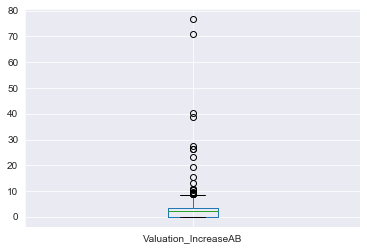

In [52]:
data.boxplot(column='Valuation_IncreaseAB')

In [42]:
data.Valuation_IncreaseAB.unique()
outliers=data[data.Valuation_IncreaseAB > 80]
outliers
#data[data.B_Valuation > 1 000 000 000]

,Full_Name,Primary_Company_x,Bachelor_University,Bachelor_Studies,Degree_Type,Master_Institution,Master_Studies,Graduate_Diploma,Years_of_Study,Years_of_Employment,...,Worked_at_Google,Worked_at_Microsoft,Worked_in_Sales,Stanford_or_Berkeley,Ivy_League,Seed_Valuation,A_Valuation,B_Valuation,Valuation_IncreaseSeedA,Valuation_IncreaseAB
174,Victor Ho,FiveStars,University of California Berkeley,Operations Research,BS,No Master,No Master,No Master,4,8.0,...,0,0,0,1,0,0.0,52.0,114000000.0,0.0,2192307.69


In [43]:
data=data.drop(outliers.index)

## Data analysis 2
I decide to filter by the number of years studied and group by bachelor studies to have the mean of valuation growth per bachelor studies. 

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
YS=8
filtered1=data[data.Years_of_Study==YS].copy()

In [50]:
result1=filtered1.groupby('Bachelor_Studies',as_index=False)['Valuation_IncreaseAB'].mean().sort_values(by='Valuation_IncreaseAB',ascending=False).head(8).round(2)
result1
# In average, the founders that studied 4 years in Operations research have the best hrowth valuation of their startups :
# there are multiply per 9. 

,Bachelor_Studies,Valuation_IncreaseAB
2,Chemistry,5.19
9,Mathematics,3.96
6,Engineering,3.83
4,Computer Science,3.76
7,English,3.44
10,Physics,2.92
0,Biology,2.46
11,Unspecified,2.13


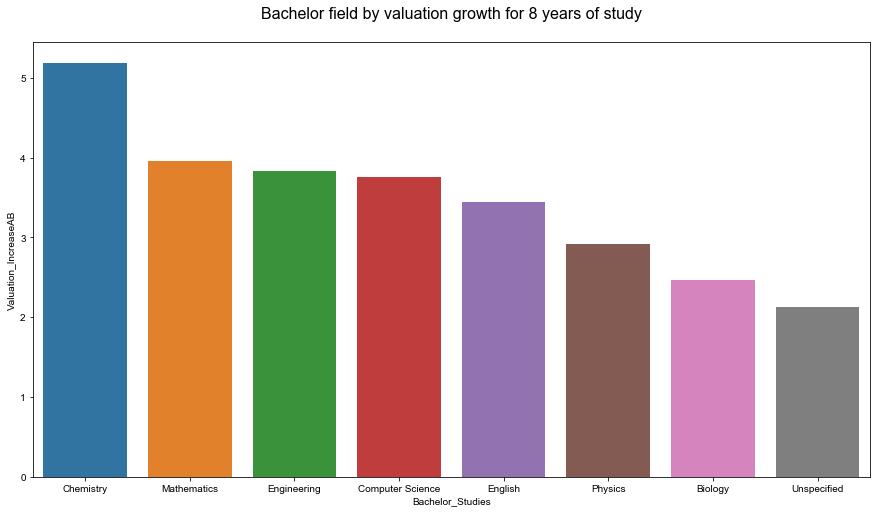

In [51]:
title1= 'Bachelor field by valuation growth for '+str(YS)+' years of study'
fig,ax=plt.subplots(figsize=(15,8))
barchart1=sns.barplot(data=result1,x='Bachelor_Studies',y='Valuation_IncreaseAB')
plt.title(title1+'\n',fontsize=16)

sns.set_style('darkgrid')
plt.show()

In [ ]:
fig1=barchart1.get_figure()
fig1.savefig(r'C:\Users\Lenovo\Ironhack\Bootcamp\Projects\startup-founder-valuations-dataset/'+'Top Bachelor studies.png')

In [ ]:
# If a founder studied 4 years in OR, his startup valuation would multiply by almost 9. 

## Data Analysis 1 
I decide to filter by the number of years studied. 
It was not relevant to calculate the mean of the valuation by Degree Type because there is too much not provided and unspecified. 

In [ ]:
YS=4
filtered=data[data.Years_of_Study==YS].copy()

In [ ]:
result =filtered[['Full_Name','Primary_Company_x','Valuation_IncreaseAB']].sort_values(by='Valuation_IncreaseAB',ascending=False).head(10)
result.head()

In [ ]:
title='Top 10 companies by Valuations growth with her/his founder studied '+ str(YS)+' years'

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
barchart=sns.barplot(data=result,x='Primary_Company_x',y='Valuation_IncreaseAB')
plt.title(title+'\n',fontsize=16)

sns.set_style('darkgrid')
plt.show()

In [ ]:
fig=barchart.get_figure()
fig.savefig(r'C:\Users\Lenovo\Ironhack\Bootcamp\Projects\startup-founder-valuations-dataset/'+'Top 10 companies.png')

In [ ]:
data.to_csv('Startup_founders_valuations.csv')